In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('datasett/meow_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14963 entries, 0 to 14962
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         14963 non-null  int64  
 1   PetID              14963 non-null  object 
 2   Type               14963 non-null  object 
 3   Name               14963 non-null  object 
 4   Age                14963 non-null  int64  
 5   Breed1             14963 non-null  object 
 6   Breed2             14963 non-null  object 
 7   Gender             14963 non-null  object 
 8   Color1             14963 non-null  object 
 9   Color2             14963 non-null  object 
 10  Color3             14963 non-null  object 
 11  MaturitySize       14963 non-null  object 
 12  FurLength          14963 non-null  object 
 13  Vaccinated         13099 non-null  object 
 14  Dewormed           13186 non-null  object 
 15  Sterilized         13155 non-null  object 
 16  Health             149

In [23]:
df.head()

,Unnamed: 0,PetID,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,...,Dewormed,Sterilized,Health,State,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed,AdoptionSpeedBool
0,0,86e1089a3,Cat,Nibble,3,Tabby,Tabby,Male,Black,White,...,No,No,Healthy,Selangor,1,100,0,1.0,2,Fast
1,1,6296e909a,Cat,No Name Yet,1,Domestic Medium Hair,Domestic Medium Hair,Male,Black,Brown,...,NaN,NaN,Healthy,Kuala Lumpur,1,0,0,2.0,0,Fast
2,2,3422e4906,Dog,Brisco,1,Mixed Breed,Mixed Breed,Male,Brown,White,...,Yes,No,Healthy,Selangor,1,0,0,7.0,3,Slow
3,3,5842f1ff5,Dog,Miko,4,Mixed Breed,Mixed Breed,Female,Black,Brown,...,Yes,No,Healthy,Kuala Lumpur,1,150,0,8.0,2,Fast
4,4,850a43f90,Dog,Hunter,1,Mixed Breed,Mixed Breed,Male,Black,Black,...,No,No,Healthy,Selangor,1,0,0,3.0,2,Fast


In [24]:
df = df.drop(["Unnamed: 0", "PetID", "Name", "VideoAmt", "PhotoAmt", "AdoptionSpeedBool"], axis=1)
df.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,State,Quantity,Fee,AdoptionSpeed
0,Cat,3,Tabby,Tabby,Male,Black,White,White,Small,Short,No,No,No,Healthy,Selangor,1,100,2
1,Cat,1,Domestic Medium Hair,Domestic Medium Hair,Male,Black,Brown,Brown,Medium,Medium,NaN,NaN,NaN,Healthy,Kuala Lumpur,1,0,0
2,Dog,1,Mixed Breed,Mixed Breed,Male,Brown,White,White,Medium,Medium,Yes,Yes,No,Healthy,Selangor,1,0,3
3,Dog,4,Mixed Breed,Mixed Breed,Female,Black,Brown,Brown,Medium,Short,Yes,Yes,No,Healthy,Kuala Lumpur,1,150,2
4,Dog,1,Mixed Breed,Mixed Breed,Male,Black,Black,Black,Medium,Short,No,No,No,Healthy,Selangor,1,0,2


In [25]:
print(df.isnull().sum())


Type                0
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated       1864
Dewormed         1777
Sterilized       1808
Health              0
State               0
Quantity            0
Fee                 0
AdoptionSpeed       0
dtype: int64


In [26]:
print(df["Vaccinated"].unique())
print(df["Dewormed"].unique())
print(df["Sterilized"].unique())

['No' nan 'Yes']
['No' nan 'Yes']
['No' nan 'Yes']


In [27]:
df["Vaccinated"] = df["Vaccinated"].map({"No": 0, np.nan: 0, "Yes": 1})
df["Dewormed"] = df["Dewormed"].map({"No": 0, np.nan: 0, "Yes": 1})
df["Sterilized"] = df["Sterilized"].map({"No": 0, np.nan: 0, "Yes": 1})

print(df["Vaccinated"].unique())
print(df["Dewormed"].unique())
print(df["Sterilized"].unique())

[0 1]
[0 1]
[0 1]


In [28]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"'{column}': {unique_values}")
    print('-' * 50)

'Type': ['Cat' 'Dog']
--------------------------------------------------
'Age': [  3   1   4  12   0   2  78   6   8  10  36  14  24   5  72  60   9  48
  62  47 120  32   7  17  22  16  13  19  11  37  18  55  20  28  74  53
  25  84  76  30 132  96  46  15  50  56  54  23  92  29  27  49  44 144
  21  31  41  51  65  34 135  39  52  42 108  81  26  38  69 212  33  75
  95  80  63  61 255  89  91  35 117  73 122 123  64  87 112 156  66  67
  77 180  82  86  40  57 168 102  45 147  68  85  88  43 238 100]
--------------------------------------------------
'Breed1': ['Tabby' 'Domestic Medium Hair' 'Mixed Breed' 'Domestic Short Hair'
 'Domestic Long Hair' 'Terrier' 'Persian' 'Rottweiler' 'Shih Tzu'
 'Siamese' 'Jack Russell Terrier' 'American Shorthair' 'Spitz'
 'Labrador Retriever' 'Pit Bull Terrier' 'Silky Terrier' 'Bombay' 'Husky'
 'Schnauzer' 'Golden Retriever' 'Siberian Husky' 'Collie'
 'German Shepherd Dog' 'Tortoiseshell' 'Doberman Pinscher' 'Calico'
 'American Staffordshire Terrie

In [29]:
breed_map = {i: v for i, v in enumerate(set(df["Breed1"].unique()).union(set(df["Breed2"].unique())))}
color_map = {i: v for i, v in enumerate(set(df["Color1"].unique()).union(set(df["Color2"].unique())).union(set(df["Color3"].unique())))}
state_map = {i: v for i, v in enumerate(set(df["State"].unique()))}

type_map = {0: 'Cat', 1: 'Dog'}
gender_map = {0: 'Male', 1: 'Female', 2: 'Mixed'}
size_map = {0: 'Small', 1: 'Medium', 2: 'Large', 3: 'Extra Large'}
length_map = {0: 'Short', 1: 'Medium', 2: 'Long'}
health_map = {0: 'Healthy', 1: 'Minor Injury', 2: 'Serious Injury'}

df["Breed1"] = df["Breed1"].map({v: k for k, v in breed_map.items()})
df["Breed2"] = df["Breed2"].map({v: k for k, v in breed_map.items()})
df["Color1"] = df["Color1"].map({v: k for k, v in color_map.items()})
df["Color2"] = df["Color2"].map({v: k for k, v in color_map.items()})
df["Color3"] = df["Color3"].map({v: k for k, v in color_map.items()})
df["State"] = df["State"].map({v: k for k, v in state_map.items()})

df["Type"] = df["Type"].map({v: k for k, v in type_map.items()})
df["Gender"] = df["Gender"].map({v: k for k, v in gender_map.items()})
df["MaturitySize"] = df["MaturitySize"].map({v: k for k, v in size_map.items()})
df["FurLength"] = df["FurLength"].map({v: k for k, v in length_map.items()})
df["Health"] = df["Health"].map({v: k for k, v in health_map.items()})

In [30]:

for column in df.columns:
    unique_values = df[column].unique()
    print(f"'{column}': {unique_values}")
    print('-' * 50)

'Type': [0 1]
--------------------------------------------------
'Age': [  3   1   4  12   0   2  78   6   8  10  36  14  24   5  72  60   9  48
  62  47 120  32   7  17  22  16  13  19  11  37  18  55  20  28  74  53
  25  84  76  30 132  96  46  15  50  56  54  23  92  29  27  49  44 144
  21  31  41  51  65  34 135  39  52  42 108  81  26  38  69 212  33  75
  95  80  63  61 255  89  91  35 117  73 122 123  64  87 112 156  66  67
  77 180  82  86  40  57 168 102  45 147  68  85  88  43 238 100]
--------------------------------------------------
'Breed1': [ 34  30  90 106  82  24  71 156 108  48  41 186   7  95   2  20 180 150
  42  67 131 179 185 133 161 115 141  91  72  88  27  16  86 153 116 102
  58 140 118  83  56 125  93 104  53 122  70 117  99 105 148 157  44  63
 128  21  12  89 129 123 120 172  40  52  65 151 138  23 137   6  74  45
  79 171  54  51  19 127 162 139  81  11  98  50  96 121  73  66  55 146
  32 158   8  35   9   3 135 126 145  22  47 136  77  59  84 147 177 15

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14963 entries, 0 to 14962
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Type           14963 non-null  int64
 1   Age            14963 non-null  int64
 2   Breed1         14963 non-null  int64
 3   Breed2         14963 non-null  int64
 4   Gender         14963 non-null  int64
 5   Color1         14963 non-null  int64
 6   Color2         14963 non-null  int64
 7   Color3         14963 non-null  int64
 8   MaturitySize   14963 non-null  int64
 9   FurLength      14963 non-null  int64
 10  Vaccinated     14963 non-null  int64
 11  Dewormed       14963 non-null  int64
 12  Sterilized     14963 non-null  int64
 13  Health         14963 non-null  int64
 14  State          14963 non-null  int64
 15  Quantity       14963 non-null  int64
 16  Fee            14963 non-null  int64
 17  AdoptionSpeed  14963 non-null  int64
dtypes: int64(18)
memory usage: 2.1 MB


In [32]:
df.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,State,Quantity,Fee,AdoptionSpeed
0,0,3,34,34,0,2,5,5,0,0,0,0,0,0,7,1,100,2
1,0,1,30,30,0,2,6,6,1,1,0,0,0,0,5,1,0,0
2,1,1,90,90,0,6,5,5,1,1,1,1,0,0,7,1,0,3
3,1,4,90,90,1,2,6,6,1,0,1,1,0,0,5,1,150,2
4,1,1,90,90,0,2,2,2,1,0,0,0,0,0,7,1,0,2


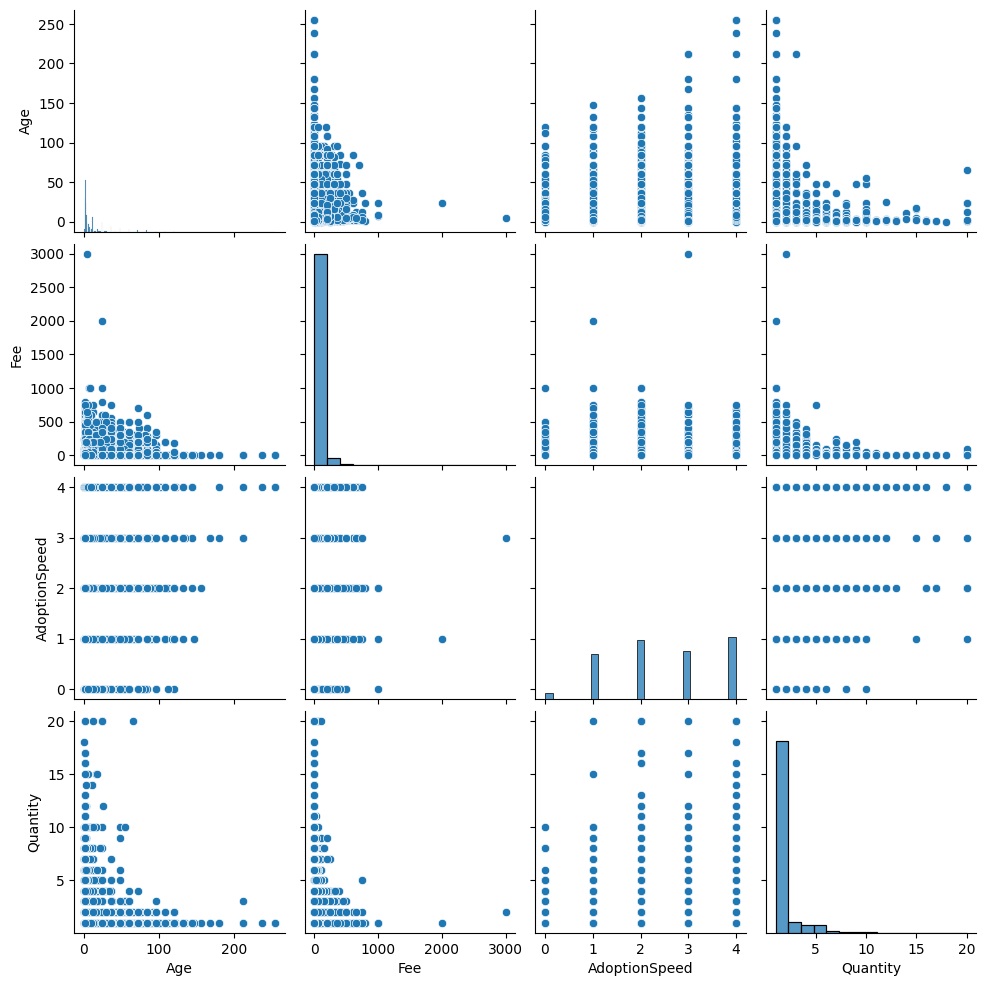

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the chosen numerical columns
selected_columns = ['Age', 'Fee', 'AdoptionSpeed', 'Quantity']

# Create pair plot
sns.pairplot(df[selected_columns])
plt.show()
